# Predicting Player overall ratings with Machine Learning

This project harnesses Python using it libaries to try and predict the overall rating of a player based on 40 attributes

This aproach will be taken on the project:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1.  Problem Definition
> We will try to predict the overall rating of players based on some physical attributes of the player

## 2. Data
The dataset used in this project is a FIFA 2019 dataset downloaded from kaggle

## 3. Evaluation
The project will be considered if the model can score a 90% in predicting the overall ratings of players.

## 4. Features 
Information from the data:
* This data has 18207 samples(rows)
* This data has 42 features (columns)

## Preparing The Tools

In [137]:
# Data Analysis and manipulation tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling tools
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor  
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Tools for saving the model
from joblib import dump

In [2]:
data = pd.read_csv("data/fifa-data.csv")
data

,ID,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,158023,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,20801,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,190871,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92
3,193080,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91
4,192985,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47
18203,243165,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47
18204,241638,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47
18205,246268,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Preferred Foot            18159 non-null  object 
 3   International Reputation  18159 non-null  float64
 4   Weak Foot                 18159 non-null  float64
 5   Skill Moves               18159 non-null  float64
 6   Crossing                  18159 non-null  float64
 7   Finishing                 18159 non-null  float64
 8   HeadingAccuracy           18159 non-null  float64
 9   ShortPassing              18159 non-null  float64
 10  Volleys                   18159 non-null  float64
 11  Dribbling                 18159 non-null  float64
 12  Curve                     18159 non-null  float64
 13  FKAccuracy                18159 non-null  float64
 14  LongPa

In [4]:
data.isna().sum()

ID                           0
Age                          0
Preferred Foot              48
International Reputation    48
Weak Foot                   48
Skill Moves                 48
Crossing                    48
Finishing                   48
HeadingAccuracy             48
ShortPassing                48
Volleys                     48
Dribbling                   48
Curve                       48
FKAccuracy                  48
LongPassing                 48
BallControl                 48
Acceleration                48
SprintSpeed                 48
Agility                     48
Reactions                   48
Balance                     48
ShotPower                   48
Jumping                     48
Stamina                     48
Strength                    48
LongShots                   48
Aggression                  48
Interceptions               48
Positioning                 48
Vision                      48
Penalties                   48
Composure                   48
Marking 

In [5]:
# Remove all null values
data.dropna(inplace=True)
data

,ID,Age,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,158023,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,20801,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,190871,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92
3,193080,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91
4,192985,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47
18203,243165,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47
18204,241638,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47
18205,246268,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47


In [6]:
# Rename the 'Preferred Foot' column to 'Foot'
data.rename(columns = {"Preferred Foot": "Foot"}, inplace = True)
data

,ID,Age,Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,158023,31,Left,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,20801,33,Right,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,190871,26,Right,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92
3,193080,27,Right,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91
4,192985,27,Right,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,19,Right,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47
18203,243165,19,Right,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47
18204,241638,16,Right,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47
18205,246268,17,Right,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47


In [7]:
data.reset_index(inplace=True)

In [8]:
# Change the Preferred foot column to 0 when 'left' and 1 when 'right'
foot_list = list(data.Foot)
new_list = []
for i in foot_list:
    if i == "Left":
        i = 0
        new_list.append(i)
    else:
        i = 1
        new_list.append(i)

new_list = pd.DataFrame(new_list)
foot_list = pd.DataFrame(foot_list)
data["Foot"] = new_list
data.drop(columns=["index"], inplace=True)
data

,ID,Age,Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,158023,31,0,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,20801,33,1,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,190871,26,1,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92
3,193080,27,1,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91
4,192985,27,1,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,238813,19,1,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47
18155,243165,19,1,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47
18156,241638,16,1,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47
18157,246268,17,1,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47


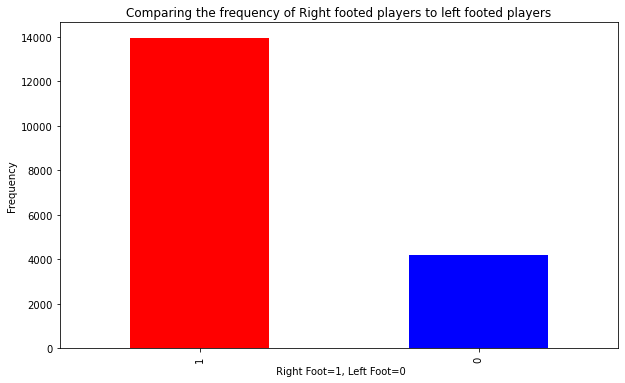

In [24]:
# PLotting the frequency of right footed players to left footed players based on the dataset
data.Foot.value_counts().plot(kind="bar", color=["Red", "Blue"], figsize=(10, 6))
plt.xlabel(" Right Foot=1, Left Foot=0")
plt.ylabel("Frequency")
plt.title("Comparing the frequency of Right footed players to left footed players");

In [27]:
pd.crosstab(data.Age, data.Overall)

Overall,46,47,48,49,50,51,52,53,54,55,...,84,85,86,87,88,89,90,91,92,94
Age,,,,,,,,,,,,,,,,,,,,,
16,1,1,2,1,3,3,9,1,1,6,...,0,0,0,0,0,0,0,0,0,0
17,0,2,8,9,20,22,17,17,26,13,...,0,0,0,0,0,0,0,0,0,0
18,0,12,12,10,27,30,32,41,56,52,...,0,0,0,0,0,0,0,0,0,0
19,0,4,3,8,20,32,37,52,54,52,...,0,0,0,0,1,0,0,0,0,0
20,0,1,3,6,12,14,17,28,38,36,...,0,0,0,0,0,0,0,0,0,0
21,0,0,1,2,10,11,25,25,38,33,...,0,0,0,0,0,0,0,0,0,0
22,0,0,1,0,1,7,7,11,12,20,...,4,1,1,0,0,0,0,0,0,0
23,0,0,0,0,1,3,7,9,11,16,...,2,4,2,0,0,0,0,0,0,0
24,0,0,0,0,3,1,1,5,3,7,...,4,1,1,1,0,2,0,0,0,0


In [36]:
# Plotting dribbling to overall frequency
fig, ax = plt.subplots(figsize = (10, 6))

ax = ax.barh(data.Dribbling, data.Overall);

Error in callback <function flush_figures at 0x00000262B9118D30> (for post_execute):


KeyboardInterrupt: 

In [37]:
# Make a correlation matrix
data.corr()

,ID,Age,Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
ID,1.000000,-0.739162,-0.001241,-0.356191,-0.075784,-0.056914,-0.131994,-0.082323,-0.106815,-0.136279,...,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,-0.417354
Age,-0.739162,1.000000,0.002625,0.253765,0.059867,0.027649,0.130545,0.068660,0.147183,0.132894,...,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,0.453069
Foot,-0.001241,0.002625,1.000000,0.001914,0.072325,-0.109496,-0.207002,-0.041634,-0.043197,-0.102362,...,-0.056024,-0.102301,-0.110979,-0.120486,0.102638,0.103829,0.104356,0.104633,0.103949,-0.043831
International Reputation,-0.356191,0.253765,0.001914,1.000000,0.128317,0.208153,0.191770,0.178373,0.157483,0.242803,...,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444,0.499491
Weak Foot,-0.075784,0.059867,0.072325,0.128317,1.000000,0.340721,0.307925,0.357416,0.183238,0.322133,...,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574,0.212015
Skill Moves,-0.056914,0.027649,-0.109496,0.208153,0.340721,1.000000,0.741035,0.743439,0.443005,0.730363,...,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.414463
Crossing,-0.131994,0.130545,-0.207002,0.191770,0.307925,0.741035,1.000000,0.655300,0.469507,0.809660,...,0.575446,0.443101,0.428963,0.409961,-0.663053,-0.660193,-0.659767,-0.660160,-0.662539,0.394972
Finishing,-0.082323,0.068660,-0.041634,0.178373,0.357416,0.743439,0.655300,1.000000,0.473427,0.661830,...,0.533414,0.024218,-0.033023,-0.071811,-0.588752,-0.587145,-0.583268,-0.584852,-0.586913,0.332515
HeadingAccuracy,-0.106815,0.147183,-0.043197,0.157483,0.183238,0.443005,0.469507,0.473427,1.000000,0.640091,...,0.507208,0.583123,0.561063,0.533643,-0.750417,-0.749888,-0.746444,-0.744443,-0.748895,0.340776
ShortPassing,-0.136279,0.132894,-0.102362,0.242803,0.322133,0.730363,0.809660,0.661830,0.640091,1.000000,...,0.685137,0.559576,0.541131,0.508644,-0.729785,-0.728024,-0.724381,-0.723782,-0.728721,0.502550


## 5. Modelling

In [40]:
data

,ID,Age,Foot,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Overall
0,158023,31,0,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,94
1,20801,33,1,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,94
2,190871,26,1,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,92
3,193080,27,1,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,91
4,192985,27,1,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18154,238813,19,1,1.0,2.0,2.0,34.0,38.0,40.0,49.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,47
18155,243165,19,1,1.0,2.0,2.0,23.0,52.0,52.0,43.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,47
18156,241638,16,1,1.0,3.0,2.0,25.0,40.0,46.0,38.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,47
18157,246268,17,1,1.0,3.0,2.0,44.0,50.0,39.0,42.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,47


In [42]:
# Split data into X and y
X = data.drop(["ID", "Overall"], axis=1)
y = data["Overall"]

In [45]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [47]:
# Create a function to fit and score with different regression models
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Ridge Regressor": Ridge(),
    "SGD Regressor": SGDRegressor()
}

def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and scores models passed in a 'models' dictionary
    models : Dictionary which contains model to be fitted and scored
    X_train : Data to be fitted without labels
    X_test : Test data without labels
    y_train : Label for training data
    y_test : Label for test data
    """
    # Setup a random seed so that results can be reproduced
    np.random.seed(7)
    
    # Create an empty dictionary to store model_scores
    model_scores = {}
    
    # Loop through models dictionary to fit and score the models
    for key, value in models.items():
        # Fit the models
        value.fit(X_train, y_train)
        
        # Score the models
        model_scores[key] = value.score(X_test, y_test)
    return model_scores



In [49]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Random Forest Regressor': 0.9620055808685927,
 'Ridge Regressor': 0.867917059418905,
 'SGD Regressor': -2.9928852126227303e+24}

In [104]:
# Turning the model_scores dictionary to a DataFrame so that it can be better understood
model_scores_df = pd.DataFrame(model_scores, index=["Coeffficient of Determination"])
model_scores_df

,Random Forest Regressor,Ridge Regressor,SGD Regressor
Coeffficient of Determination,0.962006,0.867917,-2.992885e+24


In [105]:
# Since the SGD Regressor performs very poorly, it is no longer needed in this project
model_scores_df.drop(columns=["SGD Regressor"], inplace=True)

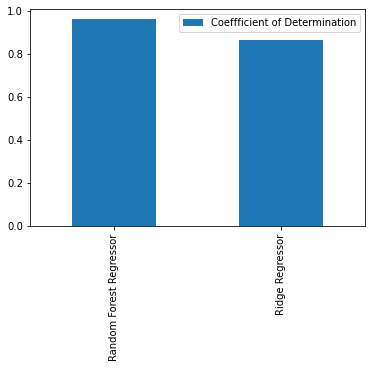

In [106]:
# Visualizing the model_scores dataframe
model_scores_df.T.plot(kind='bar');

We now have baseline models which we can try to improve

### Hyperparameter tuning using RandomizedSearchCV

In [72]:
# Create grids for both models
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}

ridge_grid = {
    "max_iter": np.arange(1, 10, 1),
    "alpha": np.arange(1, 10, 1)
}


In [74]:
# Tune the Random Forest model

rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=2,
                           verbose=True)

rs_rf.fit(X_train, y_train)
    

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [76]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 14,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [80]:
rs_rf.score(X_test, y_test)

0.8625327615171253

In [78]:
# Tune the Ridge Regressor Model
rs_ridge = RandomizedSearchCV(Ridge(),
                             param_distributions=ridge_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

rs_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.4s finished


RandomizedSearchCV(cv=5, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_iter': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=True)

In [79]:
rs_ridge.best_params_

{'max_iter': 8, 'alpha': 9}

In [81]:
rs_ridge.score(X_test, y_test)

0.8679084805149282

In [89]:
# Comparing all scores
rf = RandomForestRegressor().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
ridge_score = ridge.score(X_test, y_test)
rs_rf_score = rs_rf.score(X_test, y_test)
rs_ridge_score = rs_ridge.score(X_test, y_test)


rf_score, ridge_score, rs_rf_score, rs_ridge_score

(0.9620764576580844, 0.867917059418905, 0.8625327615171253, 0.8679084805149282)

In [90]:
score_dict = {
    "Random Forest": rf_score,
    "Ridge": ridge_score,
    "RandomizedSearch Random Forest": rs_rf_score,
    "RandomizedSearch Ridge": rs_ridge_score
}

In [100]:
scores = pd.DataFrame(score_dict, index=["Coefficient Of Determination"])
scores

,Random Forest,Ridge,RandomizedSearch Random Forest,RandomizedSearch Ridge
Coefficient Of Determination,0.962076,0.867917,0.862533,0.867908


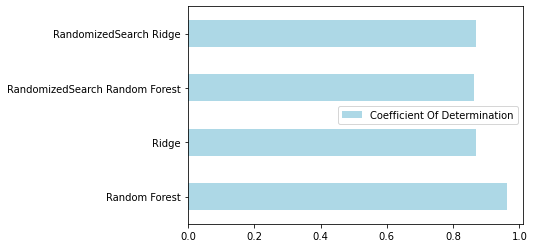

In [101]:
# Visualize the scores
scores.T.plot(kind="barh", color=["lightblue"]);

## Evaluating the model

* Mean Absolute Error
* Mean Squared Error

In [111]:
# Mean absolute error and mean squared error for Random Forest Regressor
rf_y_preds = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_preds)
rf_mse = mean_squared_error(y_test, rf_y_preds)
rf_mae, rf_mse

(0.9961701541850221, 1.7870099944933922)

In [110]:
# Mean absolute error and mean squared error for RandomizedSearch Random Forest Regressor
rs_rf_y_preds = rs_rf.predict(X_test)
rs_rf_mae = mean_absolute_error(y_test, rs_rf_y_preds)
rs_rf_mse = mean_squared_error(y_test, rs_rf_y_preds)
rs_rf_mae, rs_rf_mse

(1.9542168778790803, 6.47764723214659)

In [112]:
# Mean absolute error and mean squared error for Ridge Regressor
ridge_y_preds = ridge.predict(X_test)
ridge_mae = mean_absolute_error(y_test, ridge_y_preds)
ridge_mse = mean_squared_error(y_test, ridge_y_preds)
ridge_mae, ridge_mse

(1.962994215381673, 6.223931635722063)

In [113]:
# Mean absolute error and mean squared error for RandomizedSearch Ridge Regressor
rs_ridge_y_preds = rs_ridge.predict(X_test)
rs_ridge_mae = mean_absolute_error(y_test, rs_ridge_y_preds)
rs_ridge_mse = mean_squared_error(y_test, rs_ridge_y_preds)
rs_rf_mae, rs_rf_mse

(1.9542168778790803, 6.47764723214659)

In [122]:
# Insert MAE, MSE and coefficient of determinant scores into a dataframe
mae_mse = pd.DataFrame({
    "R^2": [rf_score, rs_rf_score, ridge_score, rs_rf_score],
    "MAE": [rf_mae, rs_rf_mae, ridge_mae, rs_rf_mae],
    "MSE": [rf_mse, rs_rf_mse, ridge_mse, rs_rf_mse]
}, ["Random Forest", "Randomized Random Forest", "Ridge", "Randomized Ridge"])
mae_mse

,R^2,MAE,MSE
Random Forest,0.962076,0.996170,1.787010
Randomized Random Forest,0.862533,1.954217,6.477647
Ridge,0.867917,1.962994,6.223932
Randomized Ridge,0.862533,1.954217,6.477647


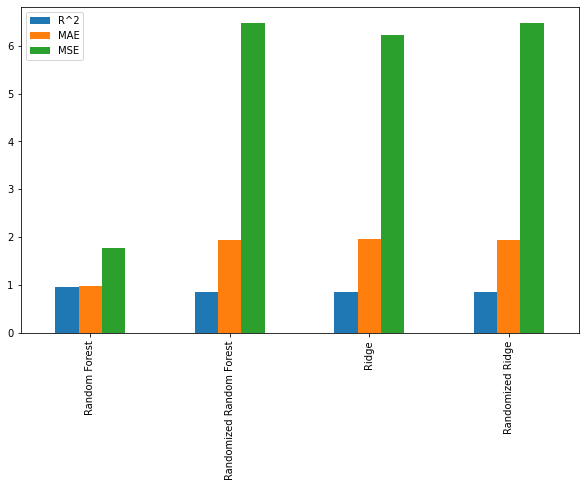

In [125]:
# Visual MAE and MSE dataframe
mae_mse.plot(kind='bar', figsize=(10, 6));

The Normal Random Forest is the better model since it has a lower MAE, a lower MSE and a higher co-efficient of determination and it satisfies the evaluation of at least 90%, so this what will be used.

## Saving the model

In [138]:
dump(rf, "models/player_rating_predictor.joblib");